In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv(r"E:\Data Analyst Bootcamp\python-projects\netflix-eda\data\netflix_titles.csv")

Understanding the data

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.duplicated()

In [ ]:
df.isnull().sum()

In [ ]:
df

Cleaning the data

In [7]:
df["director"].fillna("Not Available",inplace=True)
df["cast"].fillna("Not Available",inplace=True)
df["country"].fillna("Unknown",inplace=True)
df["date_added"].fillna("Unknown",inplace=True)



In [8]:
rating_mode=df["rating"].mode()
df["rating"].fillna("rating_mode",inplace=True)

movie_type=df[df["type"]=="Movie"]["duration"]
print(movie_type.mode())

tv_show_type=df[df["type"]=="TV Show"]["duration"]
print(tv_show_type.mode())

df.loc[(df["type"]=="Movie")
       &(df["duration"].isna()),
       "duration"]="90 min"

df.loc[(df["type"]=="TV Show")&(df["duration"].isna())
       ,
       "duration"]="1 Season"


0    90 min
Name: duration, dtype: object
0    1 Season
Name: duration, dtype: object


In [9]:
numberOfMovies=df[df["type"]=="Movie"]["type"].count()

numberOfTvShow=df[df["type"]=="TV Show"]["type"].count()


print("numberOfMovies =",numberOfMovies,",numberOfTvShow =",numberOfTvShow)

numberOfMovies = 6131 ,numberOfTvShow = 2676


neflix focus on Movies

In [14]:
countsOfworks=df["release_year"].value_counts(ascending=True)


After the year 2000, there is a noticeable increase in the number of released titles, indicating significant growth in Netflix content production.

Text(0, 0.5, 'Number of Titles')

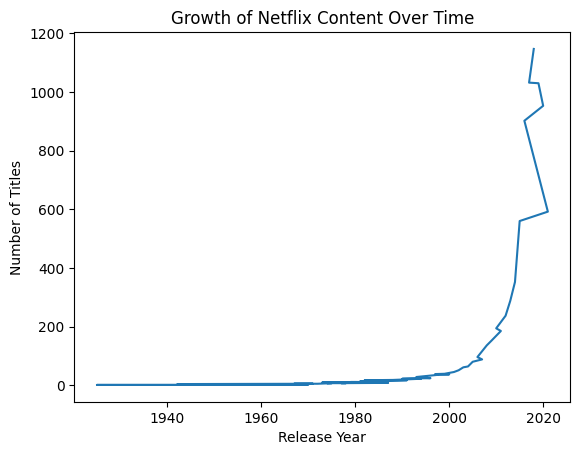

In [16]:
plt.plot(countsOfworks.index,
         countsOfworks,

         )
plt.title("Growth of Netflix Content Over Time")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")

The top countries

Text(0, 0.5, 'Number of Titles')

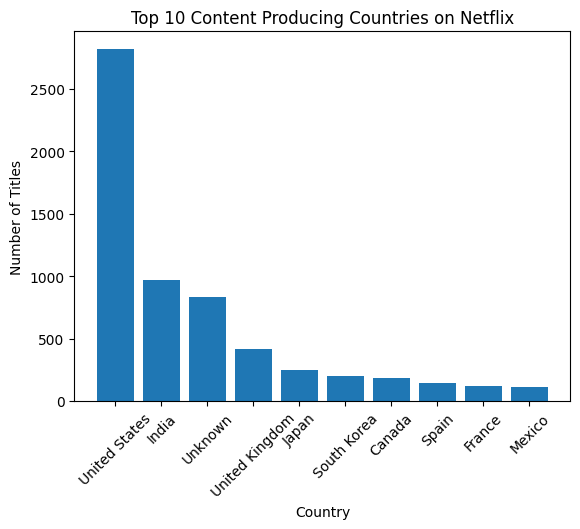

In [27]:
countsOfCountry=df["country"].value_counts()
top_country=countsOfCountry.head(10)
plt.bar(top_country.index,top_country)
plt.xticks(rotation=45)

plt.title("Top 10 Content Producing Countries on Netflix")
plt.xlabel("Country")
plt.ylabel("Number of Titles")


In [10]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Not Available,Not Available,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Not Available,Not Available,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
